 Year     Month Forecast
 1974   January     4600
 1974  February     4909
 1974     March     6457
 1974     April     2918
 1974       May     5615
 1974      June    10425
 1974      July     6876
 1974    August     5768
 1974 September     6549
 1974   October     2692
 1974  November     5490
 1974  December     5218
ARIMA MAE on 1973: 46.781
DSHW (p1=6, p2=12) MAE on 1973: 8.992

DSHW has LESS average error


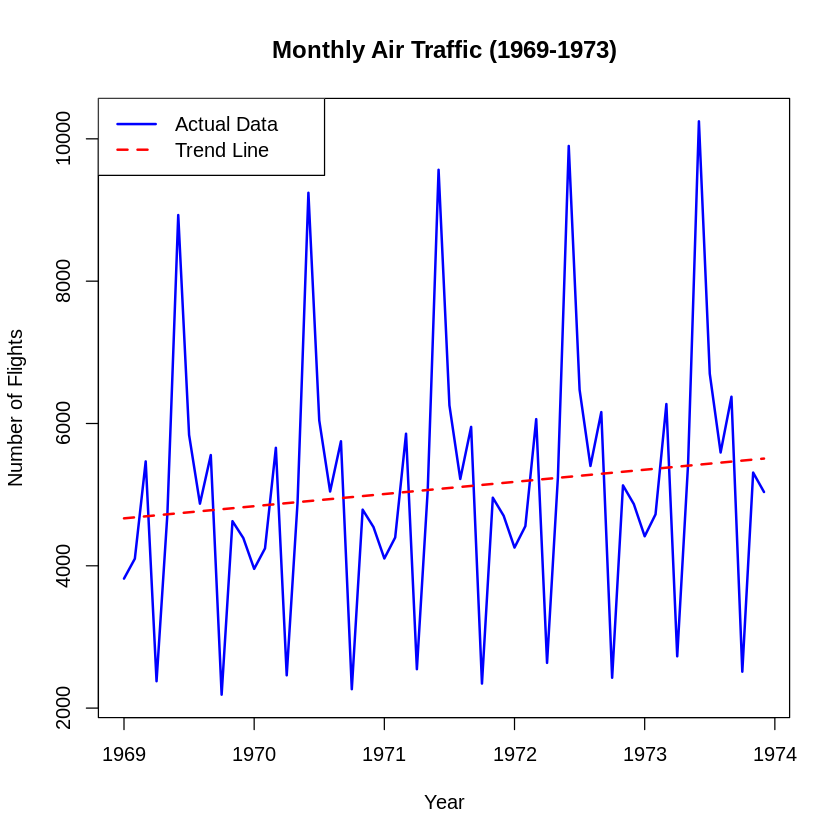

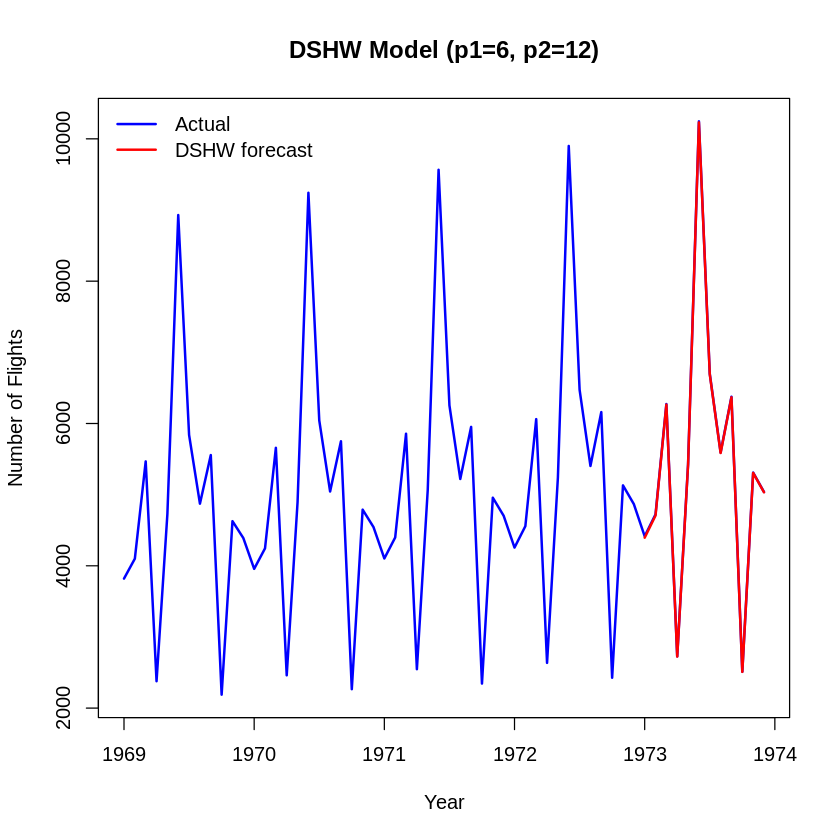

In [8]:

# Q10 - Air Traffic Time Series Analysis
library(forecast)

# DATA ENTRY
flights <- c(
3820, 4100, 5467, 2378, 4728, 8929, 5839, 4873, 5556, 2189, 4627, 4390,
3957, 4245, 5658, 2461, 4893, 9242, 6043, 5044, 5750, 2266, 4789, 4544,
4103, 4398, 5856, 2547, 5064, 9565, 6255, 5220, 5952, 2345, 4957, 4703,
4256, 4557, 6061, 2636, 5241, 9900, 6474, 5403, 6160, 2427, 5130, 4867,
4415, 4723, 6273, 2728, 5425, 10246, 6700, 5592, 6376, 2512, 5310, 5037
)

ts_flights <- ts(flights, start = c(1969, 1), frequency = 12)

# PART 1
plot(ts_flights, type = "l", col = "blue", lwd = 2, main = "Monthly Air Traffic (1969-1973)", xlab = "Year", ylab = "Number of Flights")
trend_lm <- lm(ts_flights ~ time(ts_flights))
lines(as.numeric(time(ts_flights)), fitted(trend_lm), col = "red", lwd = 2, lty = 2)
legend("topleft", legend = c("Actual Data", "Trend Line"), col = c("blue", "red"), lwd = 2, lty = c(1, 2))

# PART 2
hw_model <- HoltWinters(ts_flights)
hw_forecast <- forecast(hw_model, h = 12)
pred_1974 <- data.frame(Year = 1974, Month = month.name, Forecast = round(as.numeric(hw_forecast$mean), 0))
print(pred_1974, row.names = FALSE)

# PART 3
training <- window(ts_flights, end = c(1972, 12))
validation <- window(ts_flights, start = c(1973, 1))
MAE <- function(pred, actual) mean(abs(pred - actual), na.rm = TRUE)
arima_model <- auto.arima(training, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)
arima_forecast <- forecast(arima_model, h = length(validation))
arima_mae <- MAE(arima_forecast$mean, validation)
dshw_model <- dshw(training, period1 = 6, period2 = 12, h = length(validation))
dshw_mae <- MAE(dshw_model$mean, validation)
cat(sprintf("ARIMA MAE on 1973: %.3f\n", arima_mae))
cat(sprintf("DSHW (p1=6, p2=12) MAE on 1973: %.3f\n", dshw_mae))
if (arima_mae < dshw_mae) {
cat("\nARIMA has LESS average error\n")
} else {
cat("\nDSHW has LESS average error\n")
}
plot(ts_flights, col = "blue", xlab = "Year", ylab = "Number of Flights", main = "DSHW Model (p1=6, p2=12)", type = "l", lwd = 2)
lines(dshw_model$mean, col = "red", lwd = 2)
legend("topleft", c("Actual", "DSHW forecast"), col = c("blue", "red"), lty = 1, lwd = 2, bty = "n")